In [5]:
#lets first import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#GlobalFinMonthly
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])


# Portfolios

In this section we will learn how to do some basic math at portfolio level. You will know how to calculate return, expected return, and volatility given portfolio weights.


A portfolio is described by a set of assets and a set of weights invested in each asset.

## Why do you need to think about portfolios?


1. The great insight from Harry Markowitz was to think of risk in terms of what the stock adds to your portfolio

1. Just like meat can be good for you if you are not eating any meat, it is terrible if you are eating a lot of it

1. What investors should care about is, just like eaters, their final diet. If a given stock brings a lot of what you already have, it will be bad for you, i.e., risky.

1. So volatility is a good gauge of risk at the portfolio level, because it is asking how your whole portfolio behaves, which you obviously should care about. If it goes down a lot, it means you cannot buy stuff!

1. But when thinking about a specific stock, it's volatility means very little.

1. Unless your entire portfolio is just that stock, you don't really need to bear the stock risk--if you have 1% in a stock and the stock drops to ZERO, that is only 1% in your portfolio, so at most you lose 1%. So whatever volatility this stock might have you SHOULD not perceive the stock as very risky for you.

1. As long, of course, your position in the stock remains small.

1. Note that if this stock would move together with other pieces of your portfolio then your calculation should be very different. If this stock goes to zero exactly when your other assets are also losing a lot of money, this will feel very risky trade.


1. The amount of covariance across stocks will be a key determinant of how much we can hold very volatile stocks without adding much overall risk to our portfolio

## Covariances

The way to measure this degree of commonality between your portfolio and this particular stock is the covariance


$$Cov(R_{i,t},R_{j,t})={\sum_{t=1}^T\frac{(R_{i,t}-\overline{R_{i}})(R_{j,t}-\overline{R_{j}})}{T}}$$







In [6]:
#Lets construct excess returns as we did last lecture
Rf=Data['RF']
Data=Data.drop(columns=['RF']).subtract(Data['RF'],axis=0)

Data.head()


,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
1963-02-28,-0.0238,-0.004178,0.095922,-0.005073,NaN
1963-03-31,0.0308,0.001042,0.011849,-0.001929,-0.000387
1963-04-30,0.0451,-0.004343,-0.149555,-0.005836,0.005502
1963-05-31,0.0176,-0.004207,-0.014572,-0.002586,0.002289
1963-06-30,-0.0200,-0.000634,-0.057999,-0.013460,0.000839


Why is important to subtract the risk-free rate before our analysis?

Will this matter much for the covariances? Variances? Expected values?




The Covariance matrix of a set of stocks is the matrix where cell $(i,j)$ has the covariance between asset $i$ and asset $j$:

In [7]:
# here for two assets
Data[['MKT','WorldxUSA']].cov()

,MKT,WorldxUSA
MKT,0.001948,0.001264
WorldxUSA,0.001264,0.002182


note that the diagonal cell $(i,i)$ has the covariance between asset $i$ and asset $i$, which is just the variance of asset $i$




Another way of looking at this is the correlation matrix, which normalizes the covariances by the volatility of each asset:

$$Corr(R_{i,t},R_{j,t})={\frac{Cov(R_{i,t},R_{j,t})}{\sqrt{Var(R_{i,t})Var(R_{j,t})}}}$$

In [8]:
Data[['MKT','WorldxUSA']].corr()

,MKT,WorldxUSA
MKT,1.000000,0.613081
WorldxUSA,0.613081,1.000000


* What is noteworthy about these relationships?

* What is safer for an US investor? 

* What is safer for an international investor? 



## **Portfolio weights**

* The portfolio weight for stock $j$ , denoted $w_j$, is the fraction of a portfolio value held in stock $j$

  $$w_j=\frac{\text{Dollar held in stock j}}{\text{Dollar value of portfolio}}$$
  
* By construction, the portfolio weights allways add up to one: you invest all you got somewhere, and nothing more 

  * This doesn't mean that you can't borrow to invest, just means that you will have a negative weight somewhere offsetting the positive position in the other assets 
 
   $$\sum_{j=1}^N w_j=1$$
  
  * In matrix notation 
  
  $$\mathbf{1}'W=1$$
  
  * where $\mathbf{1}$ is a N by 1 vector of 1's (i.e. a vector with entry 1 in each position) and $W$ is the N by 1 vector of portfolio weights

## **Portfolio returns**

$$ r_p=\sum_{j=1}^N w_jr_j=W'R$$


* Where $R$ is the N by 1 vector of realized asset returns

* I use big R and big W here to emphasize that they are vectors, like  ($[r^{RF},r^{MKT},..]$), ($[w^{RF},w^{MKT},..]$),

* I use litlle $r_p$ becasue the return on a portfolio is just a scalar 


For example:

This below is the vector of return realization for a particular date 

In [9]:
Data.loc['1963-02']

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
1963-02-28,-0.0238,-0.004178,0.095922,-0.005073,NaN


* Since the return on a portfolio is a weighted sum of the returns on the securities, we need to determine how the distribution of this sum of r.v. ($R_p$) is related to the orignal distribution of eah r.v. (the individual securities returns $R_j$, $j=1...N$).

* The analysis of portfolio risk becomes much simpler by assuming that return distributions are normal.

* This means we only need to worry about mean and variance (even if we care about these really bad tail events)

In [10]:
# lets start by constructing an equal-weighted portfolio
W=np.ones(5)/5

W.shape
# W is a 65 by 1 matrix

(5,)

In [11]:
np.sum(W)

1.0

In [12]:
Data.loc['9/2008']
# R is a 1 by 6 matrix

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
2008-09-30,-0.0924,0.022193,-0.176397,-0.145744,-0.032762


In [13]:
Data.loc['9/2008'] @ W

Date
2008-09-30   -0.085022
dtype: float64

What do we do to construct the returns for all the months?

In [14]:
Data.shape

(647, 5)

In [15]:
Rp=Data @ W
Rp

Date
1963-02-28         NaN
1963-03-31    0.008275
1963-04-30   -0.021826
1963-05-31   -0.000295
1963-06-30   -0.018251
                ...   
2016-08-31    0.002451
2016-09-30    0.004230
2016-10-31   -0.026369
2016-11-30   -0.029913
2016-12-31    0.005157
Length: 647, dtype: float64

<AxesSubplot:xlabel='Date'>

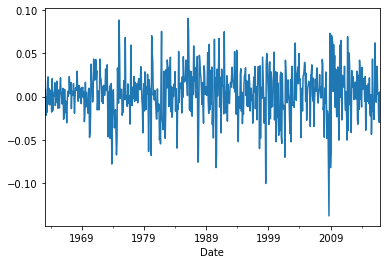

In [16]:
Rp.plot()

In [17]:
Rp.mean()

0.004144225707430337

## **Portfolio Expected returns**

* The expected return of a portfolio is the portfolio weighted average of the expected returns of the individual assets.


$$E[R_p]=E[\sum_{j=1}^N w_jr_j]=\sum_{j=1}^N w_jE[r_j]=W'E[R]$$


> Can you use the definition of expected values we learn in notebook 3 to verify that this is correct?


* Lets compute for our EW portfolio:

In [18]:
# To make sure we do the matrix multiplication correctly, it is good to see the shape of matrix first
print(W.shape)
print(Data.mean().shape)

(5,)
(5,)


In [19]:
# We use transpose function `T` to transpose W to a 1 by 6 matrix
W.T @ Data.mean()

0.004157889760767246

It should be true that taking the sample mean of our portfolio return realizations should give the same answer

In [20]:
(Data @ W).mean()

0.004144225707430337

or more directly

In [21]:
Rp.mean()

0.004144225707430337

## **Portfolio Variance**

Empirically the easiest way to compute the variance of a portfolio is to simply take the variance of the portfolio.

This returns to us the Realized variance of the portfolio in the sample

In [22]:
Rp.var()

0.000792345506788697

In [23]:
#or also

(Data @ W).var()

0.000792345506788697

When think about optimal portfolio construction is useful to have a way to go from the variance/covariances of the individual assets to variance of the portfolio

**Two asset case:**

$$Var(r_p)= Var(w_1r_1+w_2r_2)=Cov(w_1r_1+w_2r_2,w_1r_1+w_2r_2)$$

* where we used that $Var(x)=Cov(x,x)$

* We then distribute the terms

$$Cov(w_1r_1,w_1r_1+w_2r_2)+Cov(w_2r_2,w_1r_1+w_2r_2)=Cov(w_1r_1,w_1r_1)+Cov(w_2r_2,w_2r_2)+Cov(w_2r_2,w_1r_1)+Cov(w_1r_1,w_2r_2)$$

* This yields the classic formula

$$Var(r_p)= w_1^2Var(r_1)+2w_2w_1Cov(r_2,r_1)+w_2^2Var(r_2)$$

**N-asset case**

From the "term distribution"  above it is intuitive what the N asset case would look like


$$Var(r_p)= Var(\sum_{j=1}^N w_jr_j)=\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(r_j, r_i)$$


* For a portfolio of 50 assets, this expression has 50 variance terms and 2450 covariance terms!



* We can write

$$\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(r_j, r_i)=W' Cov(R) W$$

* where $Cov(R)$ is the N by N variance covariance matrix of the assets and W is the vector of weights





In [24]:
print(W.shape)
print(Data.cov().shape)

(5,)
(5, 5)


In [25]:
Data.cov()

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
MKT,0.001948,0.000111,0.001292,0.001264,0.000187
USA30yearGovBond,0.000111,0.001227,-0.000204,-0.000013,0.000264
EmergingMarkets,0.001292,-0.000204,0.003556,0.001661,0.000249
WorldxUSA,0.001264,-0.000013,0.001661,0.002182,0.000422
WorldxUSAGovBond,0.000187,0.000264,0.000249,0.000422,0.000407


In [26]:
W @ Data.cov() @ W

0.0007914039297139135

We can check that this vector notation deliver the same as the double sum by using two for loops



$$\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(r_j, r_i)=W' Cov(R) W$$



In [27]:
cov=Data.cov()
covariance_sum=0 #initiate the sum at zero
for i in cov.index: # loop across all assets
    for j in cov.columns:
        i_pos=cov.index.get_loc(i) # this gets the position of the particular asset so we can locate the proper posiiton on the vector
        j_pos=cov.columns.get_loc(j) # same thing, but for the other asset in the double sum
        covariance_sum=covariance_sum+cov.loc[i,j]*W[i_pos]*W[j_pos]
        
        
covariance_sum

0.0007914039297139133

to get the volatility, i.e. , standard deviation:

In [28]:
(W.T@ Data.cov() @ W)**0.5

0.02813190234793789

Again, as we did before, the sample variance of the portfolio return realizations we constructed above should exactly match this:


In [29]:
Rp.std()

0.02814863241418128

**Takeways**

To compute the in sample variance of a portfolio you have two options

1. Compute the time-series the portfolio returns. This will give you one time-series whch you can simply compute the variance (".var()" method

2. You can estimate the covariance matrix across assets using .cov() method and apply the quadratic formula "W @ Data.cov() @ W"


They are identical approaches and produce the same result. 

Option 2 is easier and more intuitive , but option 1 is important to understand portfolio maximization which we will do soon

**Diversification**

* A key concept in investing is diversification

* The famous: "don't put all your eggs in one basket" advice

* There are potential benefits of diversifcation for an investor when there are assets that  are imperfecly correlated with the investor portfolio

* So lets look at this from the vantage point of a US investors that is fully invested in the US equity market portfolio and is considering the benefits of investing in other world equity markets

In [30]:
# here is the co-movement across the asset
Data[['MKT','WorldxUSA']].corr()

,MKT,WorldxUSA
MKT,1.000000,0.613081
WorldxUSA,0.613081,1.000000


What is noteworthy about this correlation matrix? 

Are there any benefits of diversification?

Lets compute how the variance of the investor portfolio varies as she varies her portfolio weight on the world market

In [31]:
w=np.arange(0,1.05,0.05)
w

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [32]:
D=Data.loc[:,['MKT','WorldxUSA']]
UsW=[]
# w here is a vector of weights on the US MKT and 1-w is the the weight on the international market
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    # save the weight on the world market as the first element of UsW
    # save the vol of the investor's portfolio as the second element of UsW
    #UsW.append([1-x,((W.T @ D.cov() @ W)**0.5)*12**0.5])
    Rp=D@ W
    UsW.append([x,1-x,Rp.std()*12**0.5])
    

In [33]:
UsW=np.array(UsW)
# The first column of UsW is the weights on the US market
print(UsW[:,0])
# The second column of UsW is the weights on the World market
print(UsW[:,1])
# The third column of UsW is the vol of the portfolio
print(UsW[:,2])

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.   0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35
 0.3  0.25 0.2  0.15 0.1  0.05 0.  ]
[0.16180216 0.15851388 0.15546534 0.15267091 0.15014479 0.14790071
 0.1459517  0.1443097  0.14298529 0.14198736 0.14132283 0.14099641
 0.14101044 0.14136484 0.14205704 0.14308215 0.14443308 0.14610079
 0.14807458 0.15034239 0.15289114]


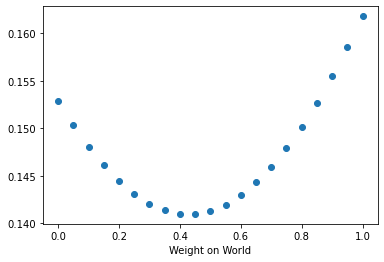

In [34]:
# Make a sacatter plot
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Weight on World')
#plt.ylim([0.04,0.05])
plt.show()

* We can also look at the investment frontier that such an investor faces: How her expected returns change with the variance

* Lets also look at annualized quantities for more intution

In [35]:
D.mean()*12

MKT          0.061684
WorldxUSA    0.049788
dtype: float64

In [36]:
D.std()*12**0.5

MKT          0.152891
WorldxUSA    0.161802
dtype: float64

In [37]:
UsW=[]
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    # save the weight on the world market as the first element of UsW
    # save the annulized vol of the portfolio as the second element of UsW
    # save the annulized expected return of the portfolio as the third element of UsW
    UsW.append([1-x,(W.T @ D.cov() @ W*12)**0.5,W.T @ np.array(D.mean())*12])
UsW=np.array(UsW)

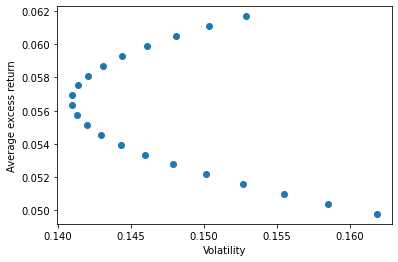

In [39]:
# UsW[:,1], the annulized vol of the portfolio
# UsW[:,2], the annulized expected return of the portfolio
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Volatility')
plt.ylabel('Average excess return')

plt.show()


* Can you tell which extreme dot corresponds to each asset?

* How can you find out easily? 

In [40]:
D.mean()*12

MKT          0.061684
WorldxUSA    0.049788
dtype: float64

In [41]:
D.std()*12**0.5

MKT          0.152891
WorldxUSA    0.161802
dtype: float64

* For the world investors, clearly they can benefit of holding a bit of the US market-and this does not depend on the preferences for risk as they can get higher returns and lower volatility through diversification

* If you are a US investor and you are comfortable with the US market volatlity, why would you ever invest in an asset of lower expected return?



> Why might the US investor want to invest in the world market even if if has a lower expected return and higher variance?